# Aula 13 - Processamento de Linguagem Natural

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Exercício e revisão da aula passada
- 2) Pré-processamento usando Word2Vec
- 3) Exercícios de NLP

# Bag of Words

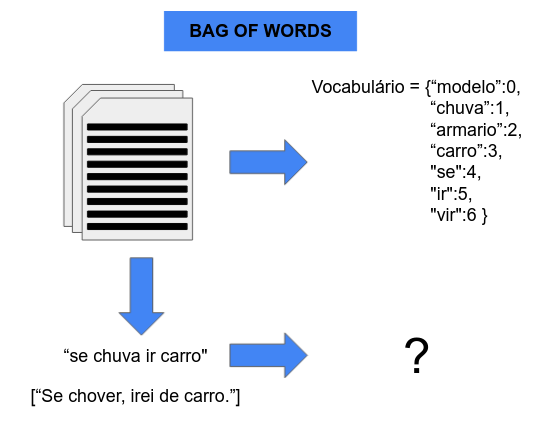

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


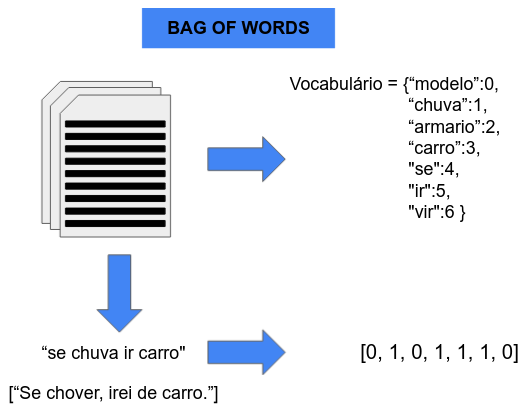

1. Perde toda informação sobre ordem das palavras.

"Fulano ama Beltrana" x "Beltrana ama Fulano"

2. Nenhuma informação subjacente sobre as palavras.

$$"carro" = [0,0,0,1,0,0,0]$$

$$"chuva" = [0,1,0,0,0,0,0]$$

# Word2vec

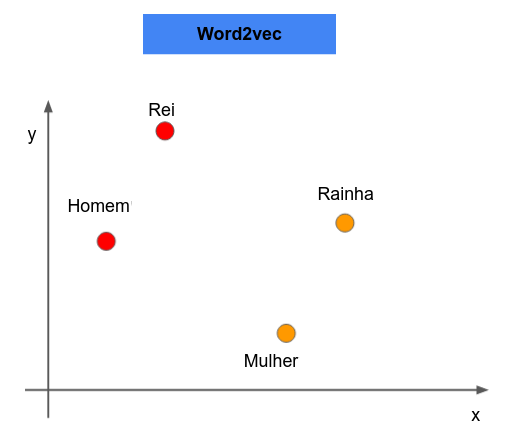

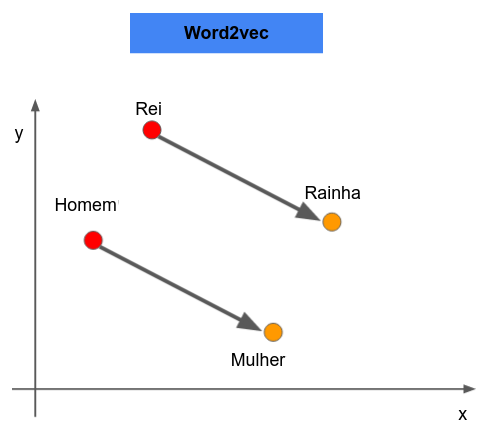

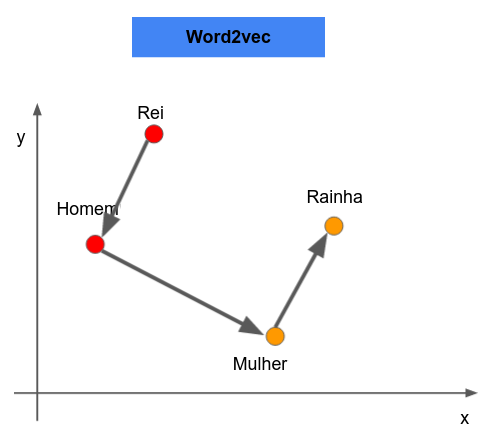

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Pipeline - Text Preprocessing
def preprocessing(string, lemmatizer, stopwords=nltk.corpus.stopwords.words('english')):
    ###
    # Remove Numbers
    string = re.sub(r'\d', '', string)
    ###
    # Remove Special Characters
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # Lowercase words
    string = string.lower()
    ###
    # Word Tokenize
    words = word_tokenize(string)
    ###
    # Remove Stopwords
    filtered_words = []
    for w in words:
        if w not in stopwords:
            filtered_words.append(w)
    ###
    # Lemmatizing Words
    lemma_words = []
    for w in filtered_words:
        l_words = lemmatizer.lemmatize(w)
        lemma_words.append(l_words)
    ###
    return lemma_words

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
textos = \
["Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all",
"Forest fire near La Ronge Sask. Canada",
"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
"13,000 people receive #wildfires evacuation orders in California",
"Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school"]

In [6]:
textos_processados = [' '.join(preprocessing(frase,lemmatizer)) for frase in textos]

In [7]:
textos_processados

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school']

In [8]:
counter = CountVectorizer()

In [9]:
counter.fit_transform(textos_processados).toarray()

array([[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]])

In [10]:
counter.vocabulary_

{'deed': 5,
 'reason': 23,
 'earthquake': 6,
 'may': 14,
 'allah': 1,
 'forgive': 11,
 'forest': 10,
 'fire': 9,
 'near': 15,
 'la': 13,
 'ronge': 26,
 'sask': 28,
 'canada': 4,
 'resident': 25,
 'asked': 2,
 'shelter': 31,
 'place': 21,
 'notified': 16,
 'officer': 17,
 'evacuation': 7,
 'order': 18,
 'expected': 8,
 'people': 19,
 'receive': 24,
 'wildfire': 33,
 'california': 3,
 'got': 12,
 'sent': 30,
 'photo': 20,
 'ruby': 27,
 'alaska': 0,
 'smoke': 32,
 'pours': 22,
 'school': 29}

In [15]:
type(counter.vocabulary_)

dict

In [17]:
for word, item in counter.vocabulary_.items():
    if item == 0:
        print(word, item)

alaska 0


In [18]:
frase = "alaska resident asked shelter place notified officer evacuation shelter place order expected"

In [22]:
counter.transform([frase]).toarray()

array([[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0]])

In [25]:
frase = "resident asked shelter shelter shelter shelter shelter place notified officer alaska evacuation shelter place order expected"

In [26]:
counter.transform([frase]).toarray()

array([[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0]])

In [27]:
counter_binary = CountVectorizer(binary=True)

In [28]:
counter_binary.fit_transform(textos_processados).toarray()

array([[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]])

In [29]:
counter_binary.vocabulary_

{'deed': 5,
 'reason': 23,
 'earthquake': 6,
 'may': 14,
 'allah': 1,
 'forgive': 11,
 'forest': 10,
 'fire': 9,
 'near': 15,
 'la': 13,
 'ronge': 26,
 'sask': 28,
 'canada': 4,
 'resident': 25,
 'asked': 2,
 'shelter': 31,
 'place': 21,
 'notified': 16,
 'officer': 17,
 'evacuation': 7,
 'order': 18,
 'expected': 8,
 'people': 19,
 'receive': 24,
 'wildfire': 33,
 'california': 3,
 'got': 12,
 'sent': 30,
 'photo': 20,
 'ruby': 27,
 'alaska': 0,
 'smoke': 32,
 'pours': 22,
 'school': 29}

In [30]:
counter_binary.transform([frase]).toarray()

array([[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]])

In [31]:
counter.transform([frase]).toarray()

array([[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0]])

---
Usando word2vec

In [32]:
#!pip install gensim

In [33]:
from gensim.models import Word2Vec

/home/alexandre/anaconda2/envs/data_science/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [34]:
textos_token = [nltk.word_tokenize(texto) for texto in textos_processados]

In [35]:
textos_token

[['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['resident',
  'asked',
  'shelter',
  'place',
  'notified',
  'officer',
  'evacuation',
  'shelter',
  'place',
  'order',
  'expected'],
 ['people', 'receive', 'wildfire', 'evacuation', 'order', 'california'],
 ['got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfire',
  'pours',
  'school']]

In [58]:
model = Word2Vec(sentences=textos_token, vector_size=2, min_count=1, workers=2, window=5)

In [59]:
model.wv

In [60]:
model.wv['shelter']

array([-0.2507714 , -0.18816864], dtype=float32)

In [61]:
model.wv['place']

array([-0.02694083,  0.01191538], dtype=float32)

In [62]:
model.wv['forest']

array([-0.41426075, -0.47244096], dtype=float32)

## CONTINUOUS BAG OF WORDS (CBOW)

<font color=Blue size=4>Window=5</font>

"(( *Se* *chover*, **leve** *um* *guarda* )) chuva com você."

"Quando chegar, conversamos"

"O rato roeu a roupa do rei de roma"

.
.
.


<font color=Blue size=4>Window=7</font>

"(( *Se* *chover*, **leve** *um* *guarda*  *chuva* )) com você."

"Quando chegar, conversamos"

"O rato roeu a roupa do rei de roma"

.
.
.


In [63]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/35 is place
word #1/35 is order
word #2/35 is evacuation
word #3/35 is wildfire
word #4/35 is shelter
word #5/35 is may
word #6/35 is allah
word #7/35 is forgive
word #8/35 is u
word #9/35 is forest


In [64]:
vectors = np.asarray(model.wv.vectors)
labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

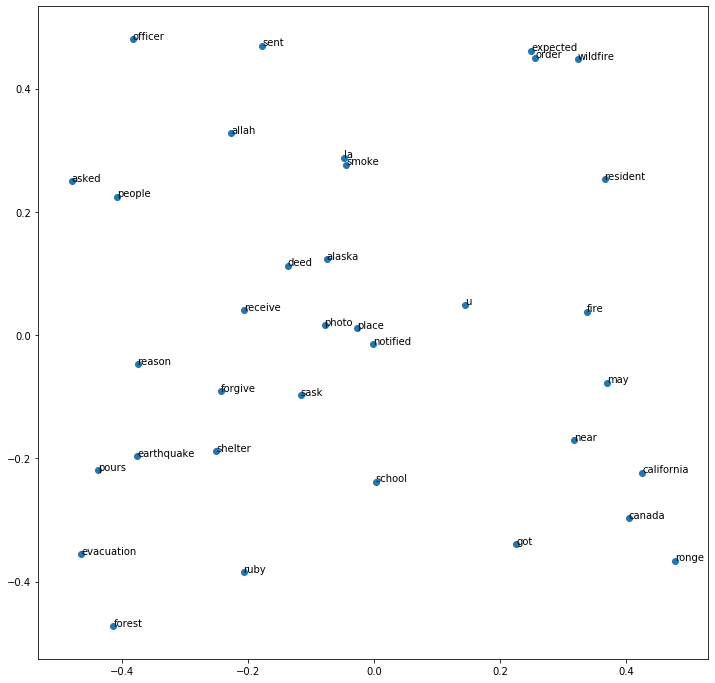

In [65]:
plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

indices = list(range(len(labels)))
for i in indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))
    
plt.show()

In [66]:
print(model.wv['people'],
      model.wv['receive'],
      model.wv['wildfire'])

[-0.40789592  0.22478986] [-0.20685387  0.04122674] [0.32294357 0.4486494 ]


In [68]:
model.wv['people'] + model.wv['receive'] + model.wv['wildfire']

array([-0.29180622,  0.714666  ], dtype=float32)

In [72]:
model.wv.similarity('people', 'wildfire')

-0.119925976

In [73]:
# Check the "most similar words", using the default "cosine similarity" measure.
result = model.wv.most_similar(positive=['expected', 'people'], negative=[])

In [74]:
result

[('sent', 0.9971799850463867),
 ('la', 0.9923838376998901),
 ('smoke', 0.9919475317001343),
 ('alaska', 0.9654723405838013),
 ('allah', 0.9493181705474854),
 ('officer', 0.926234245300293),
 ('deed', 0.8278610110282898),
 ('order', 0.6955833435058594),
 ('asked', 0.6937853693962097),
 ('place', 0.6461479067802429)]

In [75]:
import gensim.downloader as api

In [76]:
wv = api.load('word2vec-google-news-300')

In [94]:
wv.most_similar(positive=['prince', 'woman'], negative=['man'])

[('princess', 0.7041179537773132),
 ('duchess', 0.6229751110076904),
 ('monarch', 0.6019775867462158),
 ('Queen_Consort', 0.590183436870575),
 ('queen', 0.5848378539085388),
 ('Camilla', 0.5800652503967285),
 ('Princess', 0.5763431191444397),
 ('princes', 0.5672137141227722),
 ('Princess_Sikhanyiso', 0.5632773041725159),
 ('marrying_commoner', 0.5616514086723328)]

In [98]:
wv['erro']

KeyError: "Key 'erro' not present"

In [80]:
wv.similar_by_word('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510957479476929),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797566771507263),
 ('princes', 0.5646551847457886),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [81]:
wv.similarity('king', 'queen')

0.6510957

In [82]:
wv.similarity('man', 'woman')

0.76640123

In [96]:
wv['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [97]:
for index, word in enumerate(wv.index_to_key):
    if index == 100:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")

word #0/3000000 is </s>
word #1/3000000 is in
word #2/3000000 is for
word #3/3000000 is that
word #4/3000000 is is
word #5/3000000 is on
word #6/3000000 is ##
word #7/3000000 is The
word #8/3000000 is with
word #9/3000000 is said
word #10/3000000 is was
word #11/3000000 is the
word #12/3000000 is at
word #13/3000000 is not
word #14/3000000 is as
word #15/3000000 is it
word #16/3000000 is be
word #17/3000000 is from
word #18/3000000 is by
word #19/3000000 is are
word #20/3000000 is I
word #21/3000000 is have
word #22/3000000 is he
word #23/3000000 is will
word #24/3000000 is has
word #25/3000000 is ####
word #26/3000000 is his
word #27/3000000 is an
word #28/3000000 is this
word #29/3000000 is or
word #30/3000000 is their
word #31/3000000 is who
word #32/3000000 is they
word #33/3000000 is but
word #34/3000000 is $
word #35/3000000 is had
word #36/3000000 is year
word #37/3000000 is were
word #38/3000000 is we
word #39/3000000 is more
word #40/3000000 is ###
word #41/3000000 is up
word 